<a href="https://colab.research.google.com/github/YaqiGuo01/AAI6600_Group2_Project/blob/main/AAI5025_Final_Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAI5025 FINAL PROJECT Notebook

## The Customer Intelligence Pipeline (Modules 2-14 Capstone)

This project simulates a real-world data science pipeline, requiring you to apply all major concepts from the course: SQL data acquisition, Pandas wrangling, NumPy calculations, NLP feature engineering, visualization, and predictive modeling (Regression, Clustering, Classification).



## Setup: Library, Functions, and Method Imports

In [ ]:
import sqlite3
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, accuracy_score


## Data Acquisition (M13, M8)

**Goal**: Connect to the provided database file (`user_data.db`) and load the data directly into a Pandas DataFrame.

-------------------------------------------

### Task 1.1: Database Connection and Query

Ensure the file `user_data.db` is in the same directory as this notebook.

Write a SQL query that selects **ALL columns** from the `customer_reviews` table.

Use Pandas to execute the query and load the result into a DataFrame named `df`.

In [ ]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('user_data.db')
df = pd.read_sql_query("SELECT * FROM customer_reviews", conn)
conn.close()

df.head()


,ID,Gender,Education,Raw_Income,Total_Spend,Avg_Visits,Review_Text
0,1,Male,Bachelors,36000,683.26,6,Just the facts: it is bad (Ref:1-227).
1,2,Female,Masters,"$107,000",1090.29,22,My experience with this: expensive (Ref:2-467).
2,3,Male,Masters,20000,597.91,18,My opinion: it is frustrating (Ref:3-620).
3,4,Male,Masters,"$20,000",143.21,5,Just the facts: it is bad (Ref:4-150).
4,5,Male,Bachelors,"$41,000",486.49,17,I felt it was functional (Ref:5-886).


## PART A: Data Wrangling and Feature Engineering (M6, M8, M4)

**Goal:** Clean inconsistent data formats and create new features using functions and string methods.

---------------------------

### Task A.1: Data Cleaning (Raw_Income)

The Raw_Income column is a string (object) and contains '$' and ',' characters, preventing calculation.

Use a string method chain (.str.replace(), .astype()) to convert this column to a clean float.

In [ ]:
df['Clean_Income'] = df['Raw_Income'].str.replace('$','').str.replace(',','').astype(float)


### Task A.2: Wrangling and Imputation

Handle missing values and duplicate rows.

In [ ]:
df['Education'].fillna(df['Education'].mode()[0], inplace=True)
df.drop_duplicates(inplace=True)
df.isnull().sum()


/tmp/ipython-input-2529126871.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Education'].fillna(df['Education'].mode()[0], inplace=True)


,0
ID,0
Gender,0
Education,0
Raw_Income,0
Total_Spend,0
Avg_Visits,0
Review_Text,0
Clean_Income,0


### Task A.3: Feature Engineering (M4, M14)

A. **Spend per Visit** (a.k.a, average spend per visit): Create this new numerical feature .

In [ ]:
visit_col_candidates = [col for col in df.columns if 'visit' in col.lower() or ('num' in col.lower() and 'visit' in col.lower())]

if visit_col_candidates:
    visit_col = visit_col_candidates[0]
    df['Spend_per_Visit'] = df['Total_Spend'] / df[visit_col]
    print(f"Spend_per_Visit created using column: {visit_col}")
else:
    print("❌ No column found for number of visits. Please check your DataFrame columns:")
    print(df.columns)




Spend_per_Visit created using column: Avg_Visits


B. **Review Word Count:** Create this new NLP feature that counts the number of words in each review text.

In [ ]:
df['Review_Word_Count'] = df['Review_Text'].apply(lambda x: len(str(x).split()))


## PART B: Text Analysis and Correlation (M14, M10)

**Goal:** Generate sentiment scores and check for correlation between NLP features and numerical features.

-----------------

### Task B.1: Sentiment Analysis (M14)

Calculate the Polarity score for the Review_Text.

In [ ]:
from textblob import TextBlob
df['Sentiment_Score'] = df['Review_Text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


### Task B.2: Correlation Analysis (M10)

Calculate and state the correlation between the following two features:

`Review_Word_Count` and  `Sentiment_Score`

In [ ]:
corr = df['Review_Word_Count'].corr(df['Sentiment_Score'])
print(f"Correlation between Review Word Count and Sentiment Score: {corr:.2f}")


Correlation between Review Word Count and Sentiment Score: 0.12


## PART C: Visualization (M9)


**Goal:** Create visualizations to answer specific data questions, following best practices.

------------------

### Task C.1: Distribution (Histogram)

Create a Histogram showing the distribution of the clean Income column.

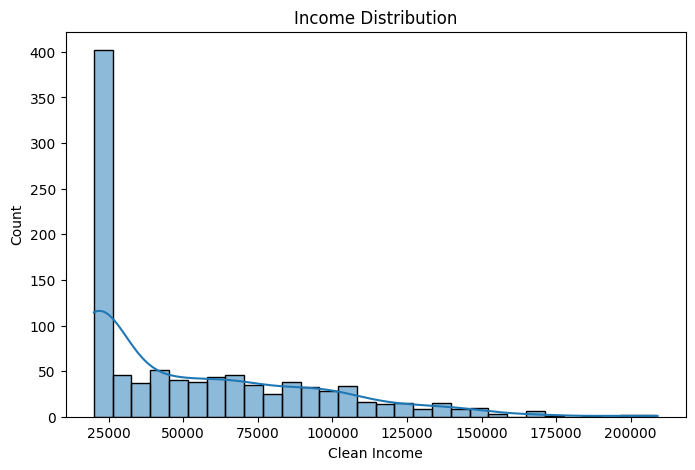

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Clean_Income'], bins=30, kde=True)
plt.title('Income Distribution')
plt.xlabel('Clean Income')
plt.ylabel('Count')
plt.show()



### Task C.2: Relationship (Scatter Plot)

Create a Scatter Plot showing the relationship between Clean_Income (`X-axis`) and Sentiment_Score (`Y-axis`).

Question: Does higher income lead to a more positive sentiment?

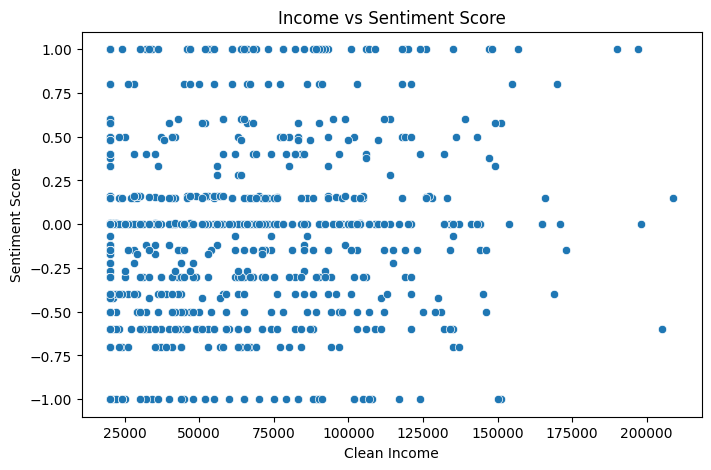

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Clean_Income', y='Sentiment_Score', data=df)
plt.title('Income vs Sentiment Score')
plt.xlabel('Clean Income')
plt.ylabel('Sentiment Score')
plt.show()


### Task C.3: Comparison (Bar Chart)

Create a Bar Chart comparing the average Spend_per_Visit across different Education levels. Ensure the Y-axis starts at zero.

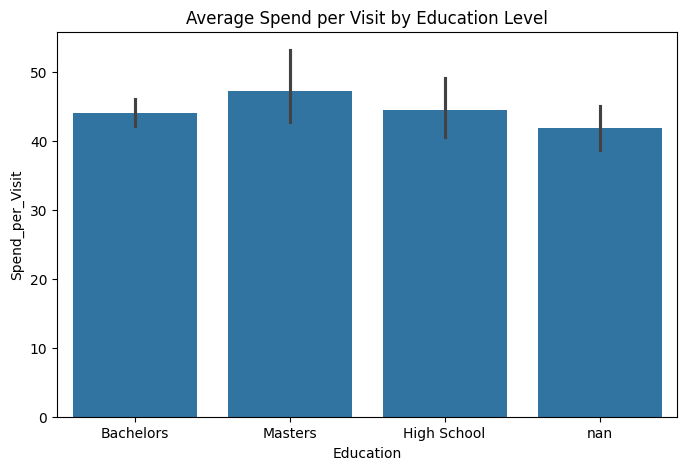

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Education', y='Spend_per_Visit', data=df)
plt.title('Average Spend per Visit by Education Level')
plt.show()



## PART D: Predictive Modeling (M10, M11)

**Goal:** Apply supervised (Regression, KNN) and unsupervised (K-Means) models.

----------------

### Task D.1: Linear Regression (M10)

Predict the continuous numerical target: `Total_Spend`.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

visit_col_candidates = [col for col in df.columns if 'visit' in col.lower() or ('num' in col.lower() and 'visit' in col.lower())]

if visit_col_candidates:
    visit_col = visit_col_candidates[0]
    X = df[['Clean_Income', visit_col]]
    y = df['Total_Spend']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"Linear Regression R^2 Score: {r2:.4f}")

else:
    print("❌ No column found for number of visits. Please check your DataFrame columns:")
    print(df.columns)



Linear Regression R^2 Score: 0.7607


### Task D.2: K-Means Clustering (M11)

Segment the users into 3 groups based on their spending and income behavior.

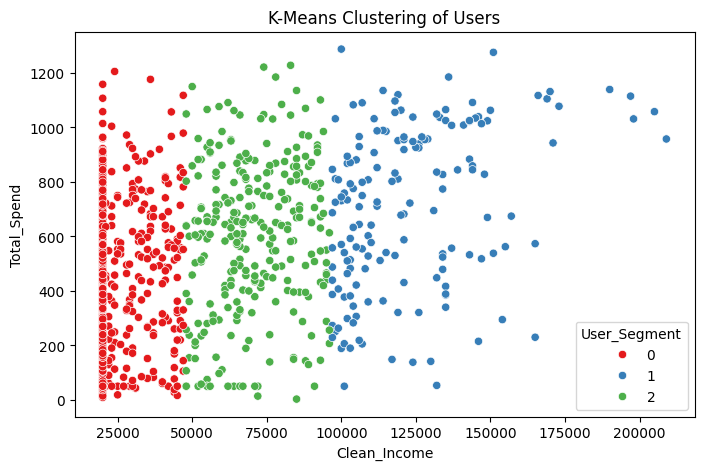

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['User_Segment'] = kmeans.fit_predict(df[['Clean_Income', 'Total_Spend']])

plt.figure(figsize=(8,5))
sns.scatterplot(x='Clean_Income', y='Total_Spend', hue='User_Segment', palette='Set1', data=df)
plt.title('K-Means Clustering of Users')
plt.show()


### Task D.3: Classification (KNN) (M11)

Predict the categorical target: `Gender`.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = df[['Clean_Income', 'Total_Spend']]
y = df['Gender']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.2f}")



KNN Accuracy: 0.45


## PART E: Final Output and Submission

--------------------

### Task E.1: Save Processed Data

Save the final DataFrame (including all new columns: `Spend_per_Visit`, `Sentiment_Score`, `User_Segment`, etc.) to a new `CSV` file.

In [ ]:
df.to_csv('final_processed_capstone_data.csv', index=False)

